In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

ticker="GOOGL"

import pandas as pd 

data=yf.download(ticker, start='2023-05-20', end='2023-07-20')

data.head()

x=data['Close']

type(x)

y=x.values
type(y)


[*********************100%***********************]  1 of 1 completed


numpy.ndarray

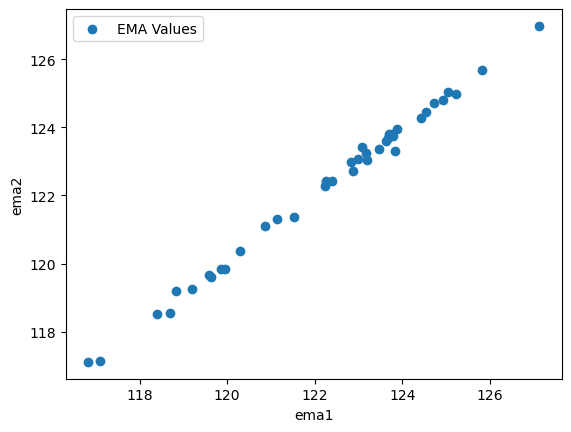

In [155]:
# create a dataframe
stockValues = pd.DataFrame(
    {'Stock_Values': y })
 
# finding EMA
# use any constant value that results in
# good smoothened curve
ema1 = stockValues.ewm(com=0.14).mean()
ema2 = stockValues.ewm(com=0.26).mean() 
# Comparison plot b/w stock values & EMA
#plt.plot(stockValues, label="Stock Values")
plt.scatter(ema1, ema2, label="EMA Values")

plt.xlabel("ema1")
plt.ylabel("ema2")
plt.legend()
plt.show()

In [156]:
new=pd.DataFrame(ema1)
new['ema2']=ema2
new.rename(columns={'Stock_Values':'ema1'} )
new['const']=1
X=['const','ema2']
Y=[new['Stock_Values']]


                            OLS Regression Results                            
Dep. Variable:                   ema2   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     9362.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           4.33e-47
Time:                        11:01:58   Log-Likelihood:                 19.185
No. Observations:                  40   AIC:                            -34.37
Df Residuals:                      38   BIC:                            -30.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.4577      1.228      2.815   

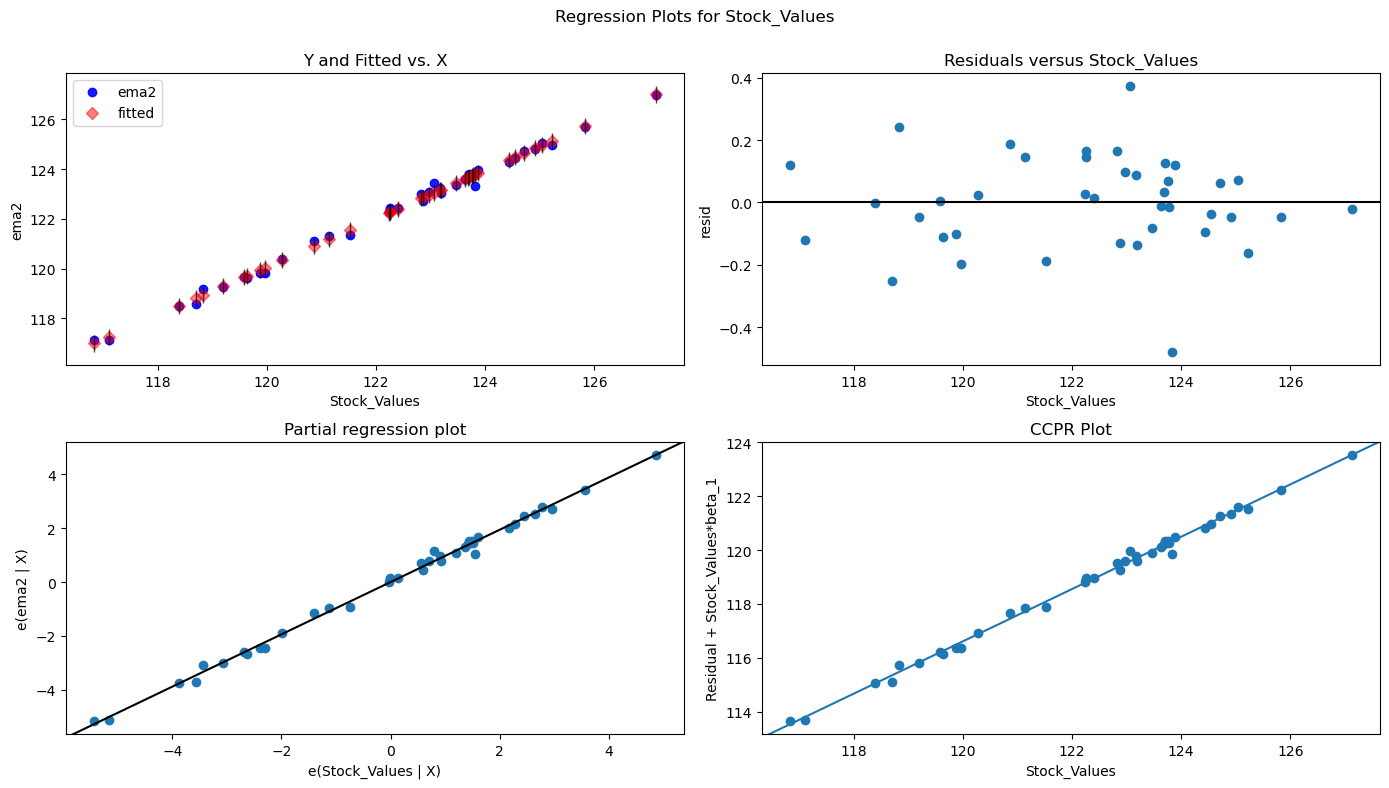

In [185]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
  
# fit simple linear regression model
linear_model = ols("ema2 ~ Stock_Values", data=new).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    1,
                                    fig=fig)

In [158]:
ans=linear_model.resid

In [159]:
ans

0     0.073335
1     0.164293
2     0.144357
3    -0.134972
4    -0.094163
5     0.069992
6     0.096362
7    -0.011809
8    -0.037254
9    -0.047134
10   -0.021049
11    0.372446
12    0.145211
13    0.026919
14   -0.082070
15   -0.015526
16    0.033445
17   -0.048129
18    0.126837
19    0.089416
20    0.188810
21   -0.130334
22    0.013626
23    0.240661
24   -0.001394
25   -0.196335
26   -0.045795
27   -0.111273
28   -0.101337
29   -0.189450
30    0.022780
31    0.003270
32    0.120141
33   -0.119096
34   -0.251890
35   -0.478863
36   -0.161929
37    0.062418
38    0.120148
39    0.165339
dtype: float64

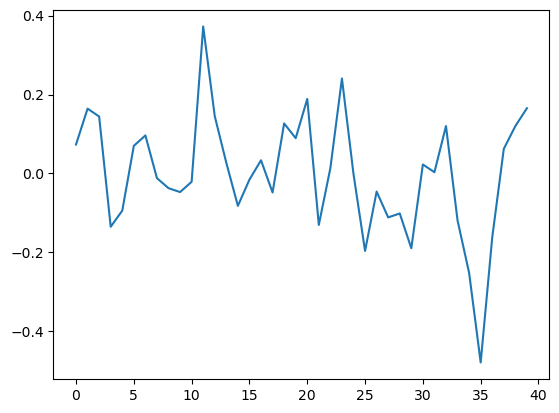

In [160]:
plt.plot(ans)

In [161]:
from statsmodels.tsa.stattools import adfuller

In [162]:
result = adfuller(ans)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.916663
p-value: 0.001916
Critical Values:
	1%: -3.610
	5%: -2.939
	10%: -2.608


In [168]:
import math 
spread= (ema1)-(ema2)

In [169]:
import scipy.stats as stats

res=stats.zscore(spread)

In [170]:
res

,Stock_Values,const,ema2
0,0.031452,NaN,NaN
1,-0.901427,NaN,NaN
2,-1.071602,NaN,NaN
3,0.978155,NaN,NaN
4,0.943560,NaN,NaN
5,-0.168807,NaN,NaN
6,-0.463501,NaN,NaN
7,0.304933,NaN,NaN
8,0.616097,NaN,NaN
9,0.896961,NaN,NaN


In [175]:
res["Stock_Values"]

0     0.031452
1    -0.901427
2    -1.071602
3     0.978155
4     0.943560
5    -0.168807
6    -0.463501
7     0.304933
8     0.616097
9     0.896961
10    0.961222
11   -2.125329
12   -0.884714
13   -0.169781
14    0.703950
15    0.354327
16    0.039491
17    0.746510
18   -0.525024
19   -0.388045
20   -1.386550
21    0.894737
22   -0.059505
23   -2.050209
24   -0.656507
25    0.796561
26   -0.247333
27    0.224775
28    0.203645
29    1.022034
30   -0.479092
31   -0.481398
32   -1.662029
33   -0.162822
34    0.918777
35    3.175302
36    1.490349
37    0.041245
38   -0.453935
39   -1.006474
Name: Stock_Values, dtype: float64

In [181]:
ema1


,Stock_Values,ema2,const
0,125.050003,125.050003,1
1,122.832342,122.985920,1
2,121.134161,121.315754,1
3,123.192386,123.036532,1
4,124.435942,124.285784,1
5,123.764059,123.797027,1
6,122.979799,123.061282,1
7,123.629099,123.584077,1
8,124.542168,124.445920,1
9,125.829742,125.687255,1


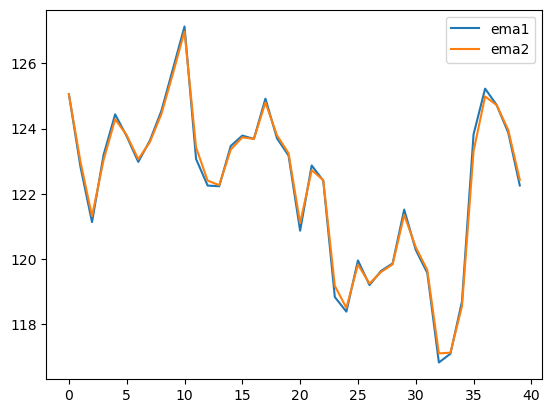

In [183]:
plt.plot(ema1["Stock_Values"])
plt.plot((ema2))
plt.legend(["ema1","ema2"])